In [1]:
import pandas as pd

# Importing Required Libraries

## Data preprocessing and model selection

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


## Regression & Classification models

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

 ## Model evaluation metrics

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report


## Visualization libraries

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#load CSV
df = pd.read_csv(r"C:\Users\Diksha\Downloads\final_cleaned_student_data.csv")

In [14]:
df.dropna(subset=['math score', 'reading score', 'writing score'], inplace=True)

# Categorizing Students Based on Average Score

In [15]:
def categorize(score):
    if score >= 80:
        return 'High'
    elif score >= 60:
        return 'Medium'
    else:
        return 'Low'

# Applying catIegorization to create a new column
df['performance_category'] = df['average_score'].apply(categorize)

print(df)


     gender race/ethnicity parental level of education         lunch  \
0    female        Group B           Bachelor'S Degree      standard   
1    female        Group C                Some College      standard   
2    female        Group B             Master'S Degree      standard   
3      male        Group A          Associate'S Degree  free/reduced   
4      male        Group C                Some College      standard   
..      ...            ...                         ...           ...   
995  female        Group E             Master'S Degree      standard   
996    male        Group C                 High School  free/reduced   
997  female        Group C                 High School  free/reduced   
998  female        Group D                Some College      standard   
999  female        Group D                Some College  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72        

#  Encoding Categorical Variables

In [16]:
# Identify categorical columns (dtype = object)
categorical_cols = df.select_dtypes(include='object').columns

# Initialize a dictionary to store label encoders for each column
encoders = {}

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

print("Encoded DataFrame:")
print(df)

print("\nEncoders and their mappings:")
for col, le in encoders.items():
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")



Encoded DataFrame:
     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test preparation course  math score  reading score  writing score  \
0                          1          72             72             74   
1                          0

#  Regression Task: Predicting Average Score

In [17]:
#  Features (X) exclude individual subject scores and target columns
X_reg = df.drop(columns=['math score', 'reading score', 'writing score', 'average_score', 'performance_category'])
y_reg = df['average_score']

#  Splitting data into training and testing sets 
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


print("X_train_reg:")
print(X_train_reg)
print("\nX_test_reg:")
print(X_test_reg)
print("\ny_train_reg:")
print(y_train_reg)
print("\ny_test_reg:")
print(y_test_reg)

X_train_reg:
     gender  race/ethnicity  parental level of education  lunch  \
29        0               3                            3      1   
535       0               2                            1      0   
695       0               3                            4      0   
557       1               2                            3      0   
836       1               4                            2      1   
..      ...             ...                          ...    ...   
106       0               3                            3      1   
270       1               2                            1      1   
860       0               2                            0      1   
435       1               2                            4      0   
102       0               3                            0      1   

     test preparation course  prep_effectiveness  
29                         1                   1  
535                        0                   0  
695                        1 

#### Linear Regression

In [18]:
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)


#### Random Forest Regressor

In [19]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)


print("First 10 predictions:")
print(y_pred_rf[:10])



First 10 predictions:
[67.30361801 70.25635714 62.20345851 57.11210317 79.85266667 60.04963492
 67.68469048 61.25016667 60.21027226 70.10107419]


# Regression Model Evaluation Function

In [20]:
def evaluate_regression(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("R²  :", r2_score(y_true, y_pred))
    print()

# Evaluating Linear Regression and Random Forest Regressor
evaluate_regression(y_test_reg, y_pred_lr, "Linear Regression")
evaluate_regression(y_test_reg, y_pred_rf, "Random Forest Regressor")

--- Linear Regression ---
MAE : 10.717163335369497
MSE : 187.4495832223678
R²  : 0.1255652122569746

--- Random Forest Regressor ---
MAE : 11.53968164923378
MSE : 220.53275281124536
R²  : -0.028764682107200512



#### Predicting Performance Category

In [21]:
X_clf = df.drop(columns=['math score', 'reading score', 'writing score', 'average_score', 'performance_category'])
y_clf = df['performance_category']

print("Features for Classification (X_clf):")
print(X_clf)

print("\nTarget for Classification (y_clf):")
print(y_clf)

Features for Classification (X_clf):
     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test preparation course  prep_effectiveness  
0                          1                   1  
1                          0                   0  
2    

In [24]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

print("X_train_clf:")
print(X_train_clf)

print("\nX_test_clf:")
print(X_test_clf)

print("\ny_train_clf:")
print(y_train_clf)

print("\ny_test_clf:")
print(y_test_clf)

X_train_clf:
     gender  race/ethnicity  parental level of education  lunch  \
29        0               3                            3      1   
535       0               2                            1      0   
695       0               3                            4      0   
557       1               2                            3      0   
836       1               4                            2      1   
..      ...             ...                          ...    ...   
106       0               3                            3      1   
270       1               2                            1      1   
860       0               2                            0      1   
435       1               2                            4      0   
102       0               3                            0      1   

     test preparation course  prep_effectiveness  
29                         1                   1  
535                        0                   0  
695                        1 

## Logistic Regression

In [25]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf)


print("X_test_clf:")
print(X_test_clf)

print("\nActual Labels (y_test_clf):")
print(y_test_clf)

print("\nPredicted Labels (y_pred_log):")
print(y_pred_log)

X_test_clf:
     gender  race/ethnicity  parental level of education  lunch  \
521       0               2                            0      1   
737       0               1                            4      0   
740       1               3                            1      1   
660       1               2                            4      0   
411       1               4                            4      1   
..      ...             ...                          ...    ...   
408       0               3                            2      0   
332       1               4                            0      1   
208       0               1                            4      0   
613       0               2                            0      1   
78        0               3                            5      1   

     test preparation course  prep_effectiveness  
521                        1                   1  
737                        0                   0  
740                        1  

## Decision Tree

In [26]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_clf, y_train_clf)
y_pred_dt = dt.predict(X_test_clf)

print("Predicted labels:")
print(y_pred_dt)

Predicted labels:
[1 2 1 1 2 1 1 2 1 0 1 0 1 2 2 0 2 2 0 1 2 2 2 1 1 2 2 1 0 2 1 2 1 2 2 2 1
 0 2 1 0 0 2 1 1 0 1 2 2 2 0 2 0 2 2 0 1 2 1 0 2 1 1 2 2 2 2 1 2 2 0 2 1 2
 2 0 0 1 2 2 2 1 0 2 1 1 0 2 0 1 1 2 1 1 2 2 2 1 1 0 0 2 1 2 1 1 2 2 0 2 2
 2 1 1 1 2 1 2 1 2 1 1 0 1 0 2 0 0 1 2 0 2 1 0 1 1 0 0 1 2 2 0 1 2 2 2 1 2
 2 2 0 0 2 2 2 2 0 1 2 0 0 1 0 1 2 1 1 1 0 2 0 2 0 2 2 1 2 1 0 0 2 1 1 1 2
 2 2 0 2 0 2 2 1 0 2 2 0 2 1 0]


## Random Forest

In [27]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)

print("Random Forest predicted labels:")
print(y_pred_rf_clf)


Random Forest predicted labels:
[1 2 1 1 2 2 2 2 2 1 1 0 1 2 2 0 2 2 0 1 2 2 2 1 2 2 2 1 0 2 1 2 2 2 2 2 2
 0 2 1 0 1 2 1 2 0 1 2 2 2 2 2 0 2 2 0 1 2 2 2 2 1 1 2 2 2 2 1 2 2 0 2 1 2
 2 2 2 1 2 2 2 1 1 2 2 1 2 2 2 1 1 2 1 1 2 2 2 1 1 2 0 2 2 2 2 1 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 1 1 0 1 0 2 2 2 2 2 0 2 1 0 1 1 0 1 1 2 2 2 2 2 2 2 1 2
 2 2 0 0 2 2 2 2 1 1 2 0 0 2 2 2 2 1 1 1 0 2 1 2 0 2 2 1 2 2 0 2 2 1 2 2 2
 2 2 0 2 2 2 2 2 0 2 2 0 2 1 0]


### Classification Model Evaluation Function

In [28]:
# -Accuracy score
def evaluate_classification(y_true, y_pred, model_name):
    print(f" {model_name} ")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


# 📊 Evaluating Classification Models
evaluate_classification(y_test_clf, y_pred_log, "Logistic Regression")
evaluate_classification(y_test_clf, y_pred_dt, "Decision Tree")
evaluate_classification(y_test_clf, y_pred_rf_clf, "Random Forest")


 Logistic Regression 
Accuracy: 0.515
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.03      0.06        31
           1       0.42      0.27      0.33        62
           2       0.54      0.79      0.65       107

    accuracy                           0.52       200
   macro avg       0.41      0.37      0.35       200
weighted avg       0.46      0.52      0.46       200

 Decision Tree 
Accuracy: 0.38
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.35      0.28        31
           1       0.33      0.35      0.34        62
           2       0.49      0.40      0.44       107

    accuracy                           0.38       200
   macro avg       0.35      0.37      0.36       200
weighted avg       0.40      0.38      0.39       200

 Random Forest 
Accuracy: 0.435
Classification Report:
               precision    recall  f1-score   support

          

## Visualization (Random Forest Classifier)

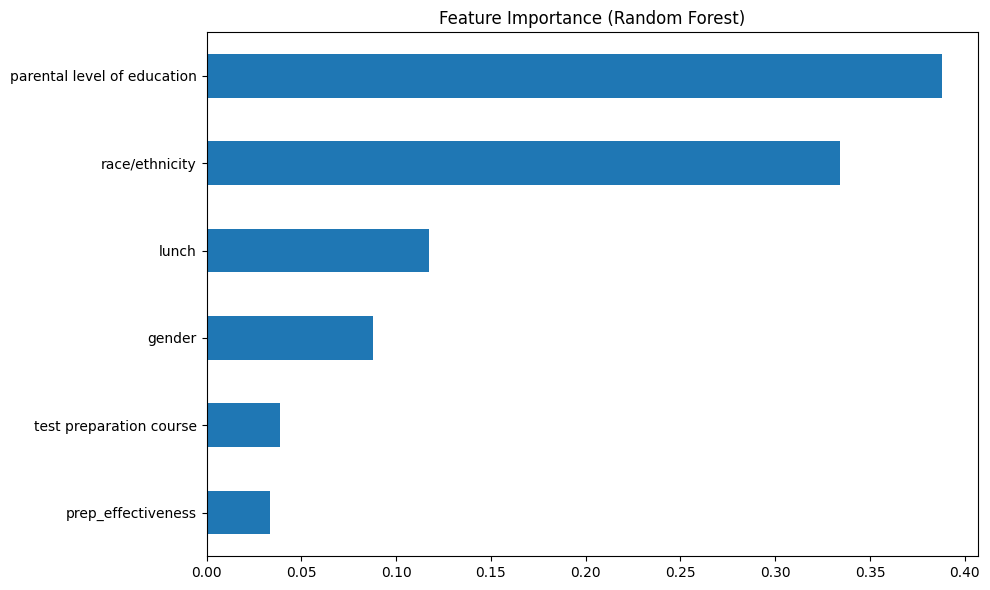

In [29]:
importances = pd.Series(rf_clf.feature_importances_, index=X_clf.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title='Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()
